# Machine Learning Analysis on Iris Data

In [33]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification 

### Phase 01 - Data Exploration

In [34]:
# Load the data set
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'outcome']
iris = pd.read_csv('datasets/iris_data.csv', names=columns)

In [35]:
# feature names
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# dimensions of the dataset
iris.shape

(150, 5)

In [37]:
# statistical description of the dataset
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
# dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   outcome       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
# class distribution
iris.groupby('outcome').size()

outcome
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

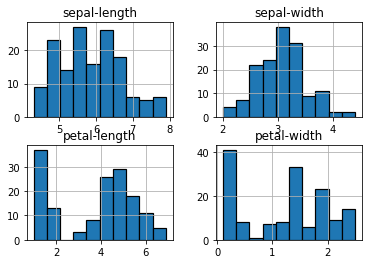

In [40]:
iris.hist(edgecolor='black', linewidth=1.2)

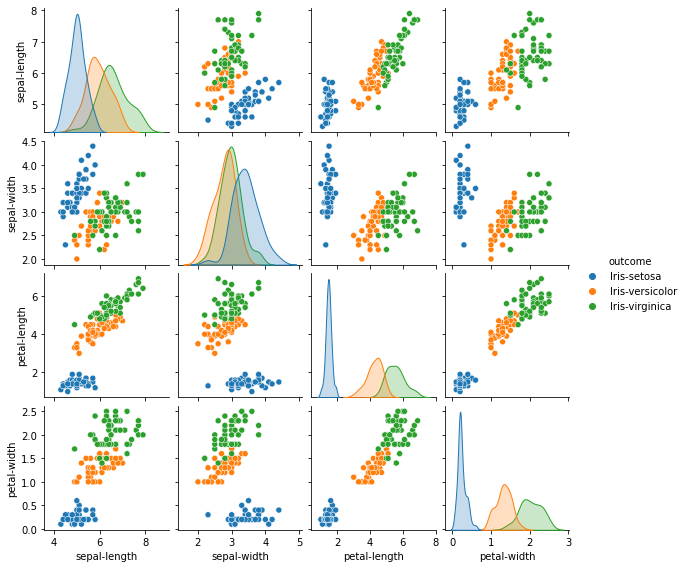

In [41]:
sns.pairplot(data=iris, hue="outcome", height=2)

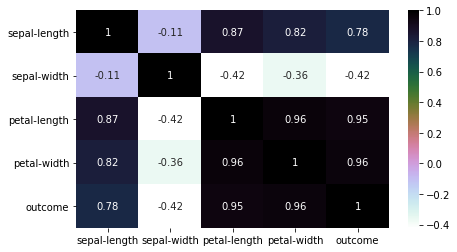

In [22]:
# Plot heatmap which shows correlations
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Phase 02 - Data Cleaning

In [23]:
# replace text outcomes classes with numerical data
cleanup_nums = {"outcome": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 2}}

iris.replace(cleanup_nums, inplace=True)
iris.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

### Phase 03 - Feature Selection

In [42]:
# features
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X = iris[features]

# responses
y = iris.outcome

### Phase 04 - Model Selection

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [44]:
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))

In [52]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.960000
1   DT  0.953333
2  BNB  0.333333
3  GNB  0.960000


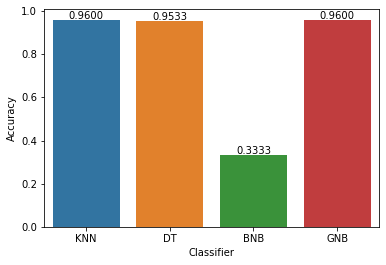

In [53]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()